In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# Dataset of 2017

In [2]:
df17 = pd.read_csv("datasets/coinmarketcap_06122017.csv")
market_cap_raw =df17[["id","market_cap_usd"]]
print(market_cap_raw["market_cap_usd"].count())
print(market_cap_raw["id"].count())

1031
1326


In [3]:
df17.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [4]:
# Filtering out rows without a market capitalization since the counts above are different. 
cap = market_cap_raw.query('market_cap_usd == market_cap_usd ' )
print(cap["market_cap_usd"].count())
print(cap["id"].count())
#now we have a dataset in which every bitcoin company id is accompanied by its market capitalization

1031
1031


In [7]:
cap.describe()

,market_cap_usd
count,1.031000e+03
mean,3.630503e+08
std,6.844947e+09
min,1.000000e+01
25%,1.880625e+05
50%,1.488564e+06
75%,1.546756e+07
max,2.130493e+11


              market_cap_usd
id                          
bitcoin         2.130493e+11
ethereum        4.352945e+10
bitcoin-cash    2.529585e+10
iota            1.475225e+10
ripple          9.365343e+09
dash            5.794076e+09
litecoin        5.634498e+09
bitcoin-gold    4.920065e+09
monero          4.331688e+09
cardano         3.231420e+09


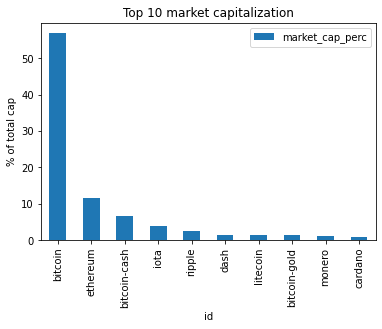

In [8]:
# Selecting the first 10 biggest, in terms of market capitalization, bitcoins
cap10 = market_cap_raw.sort_values(by="market_cap_usd",ascending=False).iloc[0:10]
cap10=cap10.set_index("id")
print(cap10)

# Calculating market_cap_perc. We divide by the sum of the market capitalization of each of the 1031 bitcoins id we have in the cap dataframe
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)


TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
ax = cap10.plot(y="market_cap_perc",kind="bar",title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

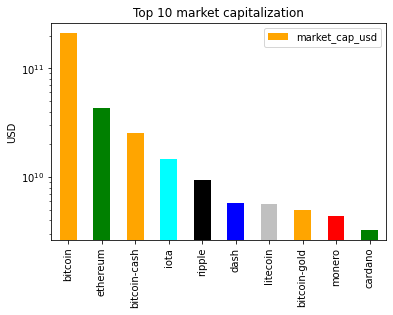

In [10]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'black', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd but we scale with log10 instead of using percentages. The colors are suggestion of the project template and signify similarities between bitcoins
ax = cap10.plot(y="market_cap_usd",kind="bar",title=TOP_CAP_TITLE,color=COLORS)
ax.set_yscale('log')
ax.set_ylabel("USD")
ax.set_xlabel("")
plt.show()

In [11]:
# We select the id, percent_change_24h and percent_change_7d columns of the initial dataset and make some minor modifications to our dataset
volatility = df17[["id","percent_change_24h","percent_change_7d"]]
volatility =volatility.set_index("id")
volatility =volatility.dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility =volatility.sort_values("percent_change_24h",ascending=True)
print(volatility.head())
print(volatility.loc['bitcoin'])
#There seem to be huge changes, mainly losses that signify an instability and unpredicatibility

               percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96
percent_change_24h     7.33
percent_change_7d     17.45
Name: bitcoin, dtype: float64


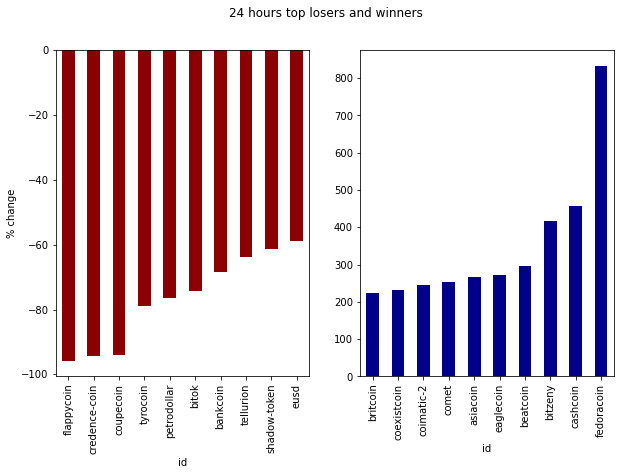

In [12]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting  the barchart for the top 10 losers
    ax = (volatility_series[:10]. plot.bar(color="darkred",
             ax=axes[0]))

    fig.suptitle(title)
    ax.set_ylabel("% change")
    # Plotting  the barchart for the top 10 winners. 
    ax = (volatility_series[-10:]. plot.bar(color="darkblue",
             ax=axes[1]))
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

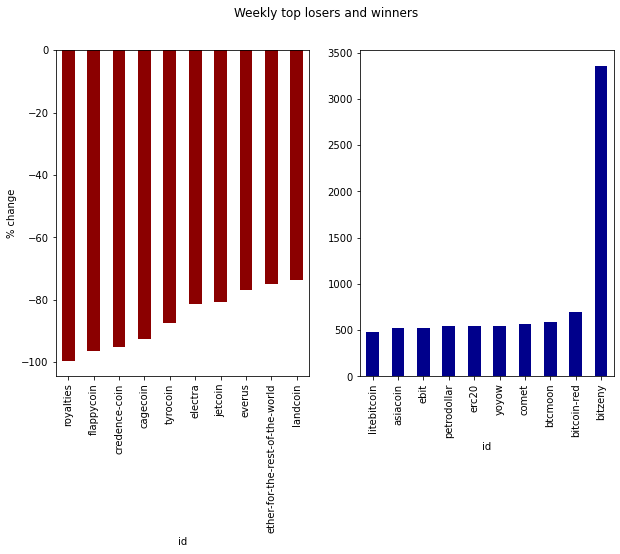

In [13]:
#We move to the weekly changes
# Sorting in ascending order
volatility =volatility.sort_values("percent_change_7d",ascending=True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax =top10_subplot(volatility.percent_change_7d, WTITLE)

In [14]:
# Selecting everything bigger than 10 billion 
largecaps =cap.query('market_cap_usd > 10**10 ' )
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


[39, 96, 896]


[]

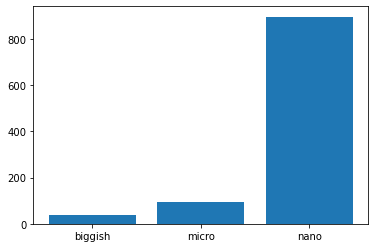

In [15]:
# Making a function for counting different marketcaps from the cap dataframe. We make the classification according to investopedia

def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]


biggish = capcount("market_cap_usd > 3E+8")
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]
print(values)

plt.bar(range(len(values)), values, tick_label=LABELS)
plt.plot()

Let's sum up what we have seen. According to the dataset (2017), Bitcoin has more than half of the market capitalization and it seems to have a small grow over the period of a day or week. 
Thus, it seems more stable although this is not something to be certain.
In general, the fluctuations are huge over small periods of time and this makes investing random.
Also, according to market capitalizitaion categories the amount of nano bitcoins is much larger than the ones that have big market cap.

# Dataset of 2018

In [16]:
df18 = pd.read_csv("datasets/coinmarketcap_06012018.csv")
market_cap_raw_18 =df18[["id","market_cap_usd"]]
print(market_cap_raw_18["market_cap_usd"].count())
print(market_cap_raw_18["id"].count())

100
100


Our dataset now is much smaller so we will focus on particular bitcoins to see their evolution

In [17]:
#We again check if there are NaN values although since the counting we did, we expect their absence
cap_18 = market_cap_raw_18.query('market_cap_usd == market_cap_usd ' )
print(cap_18["market_cap_usd"].count())
print(cap_18["id"].count())

100
100


              market_cap_usd
id                          
bitcoin         284909052105
ripple          119207709132
ethereum        100115499075
bitcoin-cash     44424061657
cardano          25916647856
litecoin         16574020942
nem              14813369998
stellar          12634630726
tron             11741640953
iota             11143859582


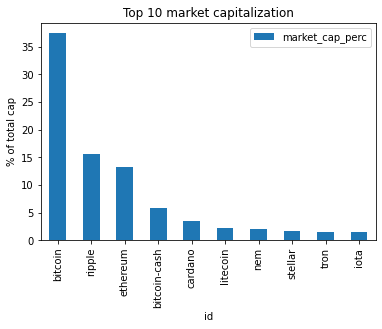

In [18]:
# Selecting the first 10 biggest, in terms of market capitalization, bitcoins
cap10_18 = market_cap_raw_18.sort_values(by="market_cap_usd",ascending=False).iloc[0:10]
cap10_18=cap10_18.set_index("id")
print(cap10_18)

# Calculating market_cap_perc. We divide by the sum of the market capitalization of each of the 1031 bitcoins id we have in the cap dataframe
cap10_18 = cap10_18.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap_18.market_cap_usd.sum())*100)


TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
ax = cap10_18.plot(y="market_cap_perc",kind="bar",title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

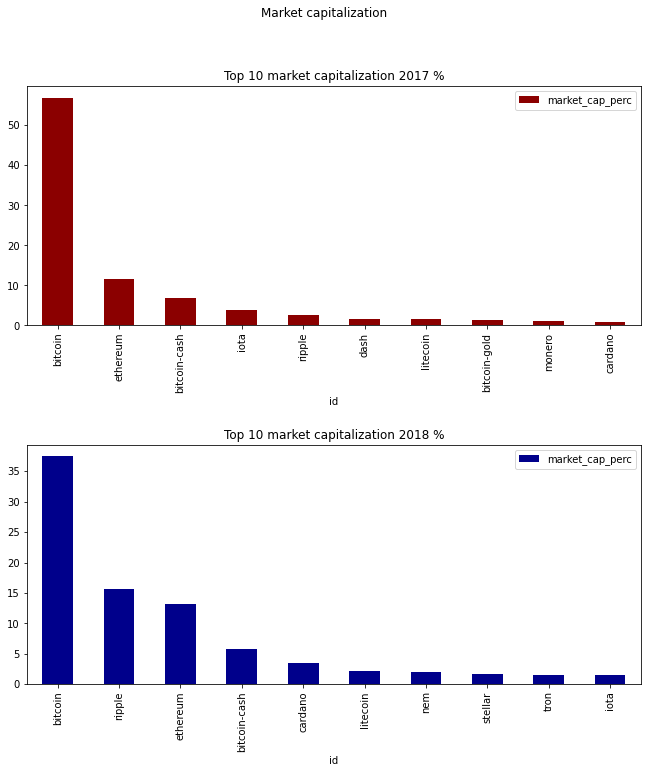

In [19]:
fig, axes = plt.subplots(2,figsize=(11, 11))
fig.suptitle('Market capitalization')
ax = cap10.plot(y="market_cap_perc",kind="bar",color="darkred",title='Top 10 market capitalization 2017 %',ax=axes[0])
ax = cap10_18.plot(y="market_cap_perc",kind="bar",color="darkblue",title='Top 10 market capitalization 2018 %',ax=axes[1])
plt.subplots_adjust(hspace=0.5)

In [20]:
cap10_18 = cap10_18.assign(market_cap_change = lambda x: (x.market_cap_perc - cap10.market_cap_perc))
print(cap10_18)

              market_cap_usd  market_cap_perc  market_cap_change
id                                                              
bitcoin         284909052105        37.447419         -19.471250
ripple          119207709132        15.668232          13.166169
ethereum        100115499075        13.158820           1.529411
bitcoin-cash     44424061657         5.838939          -0.919150
cardano          25916647856         3.406391           2.543078
litecoin         16574020942         2.178430           0.673106
nem              14813369998         1.947016                NaN
stellar          12634630726         1.660650                NaN
tron             11741640953         1.543279                NaN
iota             11143859582         1.464709          -2.476529


We see that bitcoin still has the biggest market capitalization although it has been decreased.Ripple has the biggest evolve in its share while there are 3 new bitcoins that made the top 10 list. These are the ones with NaN values in the market_cap_change column

In [21]:
volatility18 = df18[["id","percent_change_24h","percent_change_7d"]]
volatility18 =volatility18.set_index("id")
volatility18 =volatility18.dropna()
volatility18 =volatility18.sort_values("percent_change_24h",ascending=True)
print(volatility18.head())
print(volatility18.loc['bitcoin'])

          percent_change_24h  percent_change_7d
id                                             
ardor                 -20.83               2.76
tenx                  -15.81               6.55
tron                  -12.63             434.36
digixdao              -12.19              15.65
status                -11.95             201.88
percent_change_24h     5.76
percent_change_7d     26.04
Name: bitcoin, dtype: float64


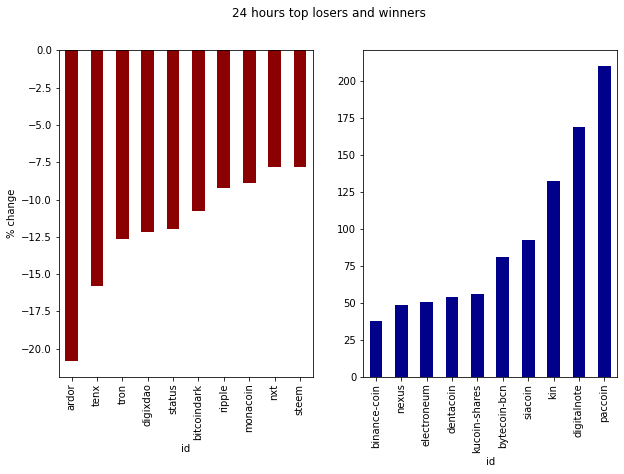

In [22]:
fig, ax = top10_subplot(volatility18.percent_change_24h, DTITLE)

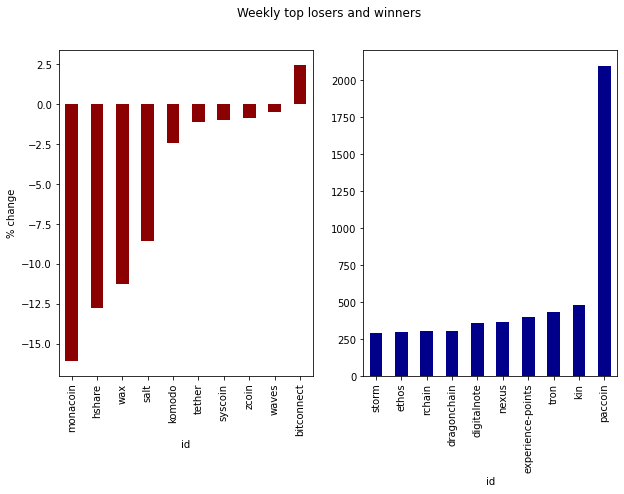

In [23]:
volatility18 =volatility18.sort_values("percent_change_7d",ascending=True)
fig, ax =top10_subplot(volatility18.percent_change_7d, WTITLE)

There seem to be big changes that strengthen the sense instability and unpredicatibility. We see that biggest loss is smaller in terms of percentage if we compare to the dataset of 2017. This also hold for the biggest win.

In [24]:
largecaps =cap_18.query('market_cap_usd > 10**10 ' )
print(largecaps)

             id  market_cap_usd
0       bitcoin    284909052105
1        ripple    119207709132
2      ethereum    100115499075
3  bitcoin-cash     44424061657
4       cardano     25916647856
5      litecoin     16574020942
6           nem     14813369998
7       stellar     12634630726
8          tron     11741640953
9          iota     11143859582


We see that there are more bitcoins(10) that fall in the large-capital category compared to 2017 (4).

[99, 1, 0]


[]

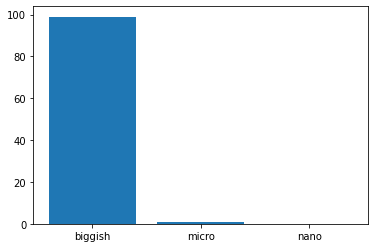

In [25]:
# Making a function for counting different marketcaps from the cap dataframe. We make the classification according to investopedia

def capcount(query_string):
    return cap_18.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]


biggish = capcount("market_cap_usd > 3E+8")
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]
print(values)

plt.bar(range(len(values)), values, tick_label=LABELS)
plt.plot()

# Dataset comparison

In [29]:
common = pd.merge(df17, df18, how='inner', on=['id'], suffixes=('_17', '_18'))

In [30]:
print(len(common))

96


In [31]:
common.head()

,Unnamed: 0_17,24h_volume_usd_17,available_supply_17,id,last_updated_17,market_cap_usd_17,max_supply_17,name_17,percent_change_1h_17,percent_change_24h_17,...,max_supply_18,name_18,percent_change_1h_18,percent_change_24h_18,percent_change_7d_18,price_btc_18,price_usd_18,rank_18,symbol_18,total_supply_18
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,...,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.80000,1,BTC,16785225
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,...,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.21000,3,ETH,96803840
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,...,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.23000,4,BCH,16896225
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,...,2.779530e+09,IOTA,-3.03,0.89,19.45,0.000242,4.00926,10,MIOTA,2779530283
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,...,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.07719,2,XRP,99993093880


In [32]:
common=common[["id","percent_change_24h_18","percent_change_24h_17","percent_change_7d_18","percent_change_7d_17","market_cap_usd_18","market_cap_usd_17"]]

In [33]:
common.head()

,id,percent_change_24h_18,percent_change_24h_17,percent_change_7d_18,percent_change_7d_17,market_cap_usd_18,market_cap_usd_17
0,bitcoin,5.76,7.33,26.04,17.45,284909052105,2.130493e+11
1,ethereum,-1.04,-3.93,45.01,-7.33,100115499075,4.352945e+10
2,bitcoin-cash,7.99,-5.51,2.81,-4.75,44424061657,2.529585e+10
3,iota,0.89,83.35,19.45,255.82,11143859582,1.475225e+10
4,ripple,-9.23,-3.70,24.15,-14.79,119207709132,9.365343e+09


In [34]:
query='percent_change_7d_18 ==percent_change_7d_18 & market_cap_usd_18 == market_cap_usd_18'
cap_common=common.query(query)
len(cap_common)

96

In [35]:
print(cap_common["percent_change_24h_18"].count()-cap_common["id"].count())
print(cap_common["percent_change_24h_17"].count()-cap_common["id"].count())
print(cap_common["percent_change_7d_18"].count()-cap_common["id"].count())
print(cap_common["percent_change_7d_17"].count()-cap_common["id"].count())
print(cap_common["market_cap_usd_18"].count()-cap_common["id"].count())
print(cap_common["market_cap_usd_17"].count()-cap_common["id"].count())

0
0
0
-1
0
-4


In [36]:
cap_common10=cap_common.sort_values(by="market_cap_usd_18",ascending=False).iloc[0:10]

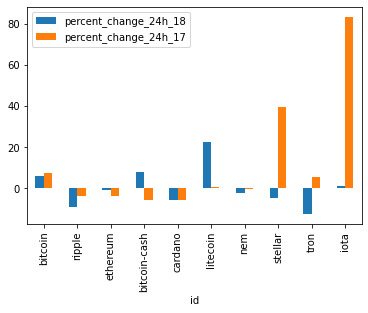

In [37]:
cap_common10.plot(x="id",y=["percent_change_24h_18","percent_change_24h_17"],kind="bar")
plt.show()

In [38]:
cap_common = cap_common.assign(market_cap_change = lambda x: (x.market_cap_usd_18 - x.market_cap_usd_17))
cap_common=cap_common.sort_values("market_cap_change",ascending=True)
cap_common=cap_common.set_index("id")


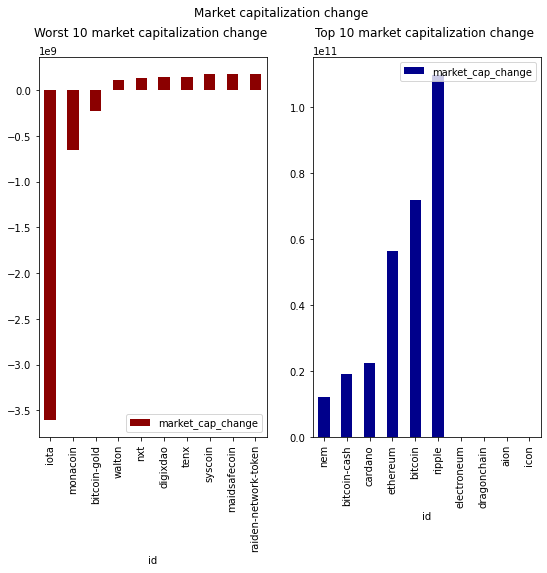

In [39]:
fig, axes = plt.subplots(1,2,figsize=(9, 7))
fig.suptitle('Market capitalization change')
ax = cap_common[:10].plot(y="market_cap_change",kind="bar",color="darkred",title='Worst 10 market capitalization change \n ',ax=axes[0])
ax = cap_common[-10:].plot(y="market_cap_change",kind="bar",color="darkblue",title='Top 10 market capitalization change \n',ax=axes[1])
plt.subplots_adjust(hspace=1)
plt.show()

Iota had the worst change in its market cap while ripple had the best

In [40]:
cap_common.loc["iota"]

percent_change_24h_18    8.900000e-01
percent_change_24h_17    8.335000e+01
percent_change_7d_18     1.945000e+01
percent_change_7d_17     2.558200e+02
market_cap_usd_18        1.114386e+10
market_cap_usd_17        1.475225e+10
market_cap_change       -3.608386e+09
Name: iota, dtype: float64

In [41]:
cap_common.loc["ripple"]

percent_change_24h_18   -9.230000e+00
percent_change_24h_17   -3.700000e+00
percent_change_7d_18     2.415000e+01
percent_change_7d_17    -1.479000e+01
market_cap_usd_18        1.192077e+11
market_cap_usd_17        9.365343e+09
market_cap_change        1.098424e+11
Name: ripple, dtype: float64

In [42]:
cap_common["market_cap_17_sum"]=cap_common["market_cap_usd_17"].sum()

In [43]:
cap_common["market_cap_18_sum"]=cap_common["market_cap_usd_18"].sum()

In [44]:
#We will examine if the total sum of the market_cap in USD has increased in one year. 
#Note that this difference takes account only the bitcoins that are common in the two dataframes

common_df=cap_common["market_cap_18_sum"]-cap_common["market_cap_17_sum"]
print(common_df.loc["bitcoin"])

394093075257.0


We see that the total sum of the market_cap in USD has increased over 1 year